In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nalger_helper_functions import VectorPolynomial, \
    vector_polynomial_interpolation, vector_floater_hormann_rational_interpolation, polynomial_coeffs_from_roots

### Vector polynomial:

$$p(t) = v_1 + v_2 t + v_3 t^3 + \dots + v_k t^k$$

where $v_1\in \mathbb{R}^d$, $v_2\in \mathbb{R}^d$, $\dots$, $v_k\in \mathbb{R}^d$ are vectors

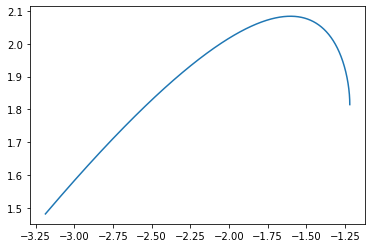

In [2]:
d = 2 # spatial dimension
k = 5 # polynomial order+1

t_start = 0.0
t_stop = 1.0
Nt = 1000 # num timesteps

poly_coeffs = np.random.randn(d, k)
poly = VectorPolynomial(poly_coeffs)

tt = np.linspace(t_start, t_stop, Nt)
pp = poly(tt)

plt.plot(pp[:,0], pp[:,1])

In [3]:
pp_true = np.zeros((Nt, d))
for n in range(Nt):
    t = tt[n]
    pt = 0.0
    for ii in range(k):
        pt += poly_coeffs[:,ii] * (t**ii)
    pp_true[n,:] = pt

err_poly = np.linalg.norm(pp_true - pp)
print('err_poly=', err_poly)

err_poly= 0.0


### Vector polynomial arithmetic

In [4]:
d = 134 # spatial dimension
k1 = 5 # first polynomial order+1
k2 = 7 # second polynomial order+1

p1 = VectorPolynomial(np.random.randn(d, k1))
p2 = VectorPolynomial(np.random.randn(d, k2))

tt = np.random.randn(Nt)

c1 = 3.2
c2 = -1.6

pp_combo = (c1*p1 + c2*p2)(tt)
pp_combo_true = c1*p1(tt) + c2*p2(tt)

err_linear_combo = np.linalg.norm(pp_combo - pp_combo_true) / np.linalg.norm(pp_combo_true)
print('err_linear_combo=', err_linear_combo)

err_linear_combo= 1.0818260246037932e-16


In [5]:
pp_mul = (p1 * p2)(tt)
pp_mul_true = p1(tt) * p2(tt)

err_mul = np.linalg.norm(pp_mul - pp_mul_true) / np.linalg.norm(pp_mul_true)
print('err_mul=', err_mul)

err_mul= 4.3050710240856476e-16


### Derivative of vector polynomial

In [6]:
t0 = np.random.randn()
s = 1e-8
t1 = t0 + s

dp1 = p1.derivative()

tangent = dp1(t0)
tangent_diff = (p1(t1) - p1(t0)) / s

err_derivative = np.linalg.norm(tangent - tangent_diff) / np.linalg.norm(tangent_diff)
print('s=', s, ', err_derivative=', err_derivative)

s= 1e-08 , err_derivative= 1.6529219429202482e-08


### Arc length of vector polynomial

Find arc length of $p(t)$ from $t=0$ to $t=T$

In [7]:
s=1e-4
T = 1.5

L = p1.arc_length(T)

tt = np.linspace(0.0, T, int(T/s))
pp = p1(tt)
L_diff = np.sum(np.linalg.norm(pp[1:] - pp[:-1], axis=1))

err_arc_length = np.abs(L - L_diff) / np.abs(L_diff)
print('s=', s, ', err_arc_length=', err_arc_length)

s= 0.0001 , err_arc_length= 4.028567078267939e-10


### Arc time of vector polynomial

Find $T$ such that the length of $p(t)$ from $t=0$ to $t=T$ equals $L$


In [8]:
T2 = p1.arc_time(L, display_soln=True, rtol=1e-12)

err_arc_time = np.abs(T - T2) / np.abs(T)
print('err_arc_time=', err_arc_time)

      converged: True
           flag: 'converged'
 function_calls: 30
     iterations: 29
           root: 1.4999999999999987
err_arc_time= 8.881784197001252e-16


### Vector rational function arithmetic


In [9]:
Nt = 1000

d = 134 # spatial dimension
k1 = 5 # first polynomial order+1
k2 = 7 # second polynomial order+1
k3 = 2 # third polynomial order+1

p1 = VectorPolynomial(np.random.randn(d, k1))
p2 = VectorPolynomial(np.random.randn(d, k2))
p3 = VectorPolynomial(np.random.randn(d, k3))

tt = np.random.randn(Nt)

a = 2.1
b = -4.6

rat = (-p1 / (a*p2) + p3) / b

qq = rat(tt)
qq_true = (-p1(tt) / (a*p2(tt)) + p3(tt)) / b

err_rat = np.linalg.norm(qq - qq_true) / np.linalg.norm(qq_true)
print('err_rat=', err_rat)

err_rat= 6.568094348206592e-12


### Derivative of vector rational function


In [10]:
t0 = np.random.randn()
s = 1e-8
t1 = t0 + s

drat = rat.derivative()

tangent = drat(t0)
tangent_diff = (rat(t1) - rat(t0)) / s

err_rat_derivative = np.linalg.norm(tangent - tangent_diff) / np.linalg.norm(tangent_diff)
print('s=', s, ', err_rat_derivative=', err_rat_derivative)

s= 1e-08 , err_rat_derivative= 1.6774470771659956e-06


### Arc length of vector rational function

Find arc length of $p(t)/q(t)$ from $t=0$ to $t=T$

In [11]:
num = rat.numerator
den = VectorPolynomial(np.abs(rat.denominator.coeffs))
rat = num / den

s=1e-4
T = 1.5

L = rat.arc_length(T)

tt = np.linspace(0.0, T, int(T/s))
rr = rat(tt)
L_diff = np.sum(np.linalg.norm(rr[1:] - rr[:-1], axis=1))

err_rat_arc_length = np.abs(L - L_diff) / np.abs(L_diff)
print('s=', s, ', err_rat_arc_length=', err_rat_arc_length)

s= 0.0001 , err_rat_arc_length= 3.64623208496144e-06


### Arc time of vector rational function

Find $T$ such that the length of $p(t)/q(t)$ from $t=0$ to $t=T$ equals $L$


In [12]:
T2 = rat.arc_time(L, display_soln=True, rtol=1e-12)

err_rat_arc_time = np.abs(T - T2) / np.abs(T)
print('err_rat_arc_time=', err_rat_arc_time)

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 15
           root: 1.5000000000000009
err_rat_arc_time= 5.921189464667501e-16


In [13]:
# d=78
# num_pts = 9
# j=3
#
# t = np.random.randn()
#
# pts = np.random.randn(num_pts)
#
# lagrange_poly = lagrange_polynomial_vectorized(pts, j)
#
# q = lagrange_poly(t).reshape(-1)
#
# xj = pts[:,j].reshape((-1,1))
# roots = np.bmat([pts[:,:j].reshape((d,-1)), pts[:,j+1:].reshape((d,-1))])
#
# q_true = (np.prod(t - roots, axis=1) / np.prod(xj - roots, axis=1)).reshape(-1)
#
# err_lagrange_vector_polynomial = np.linalg.norm(q-q_true)/np.linalg.norm(q_true)
# print('err_lagrange_vector_polynomial=', err_lagrange_vector_polynomial)

yy.shape= (7, 2)
yy[ii:ii+degree+1, :].shape= (4, 2)
len(tt_i)= 4
yy.shape= (7, 2)
yy[ii:ii+degree+1, :].shape= (4, 2)
len(tt_i)= 4
yy.shape= (7, 2)
yy[ii:ii+degree+1, :].shape= (4, 2)
len(tt_i)= 4
yy.shape= (7, 2)
yy[ii:ii+degree+1, :].shape= (4, 2)
len(tt_i)= 4


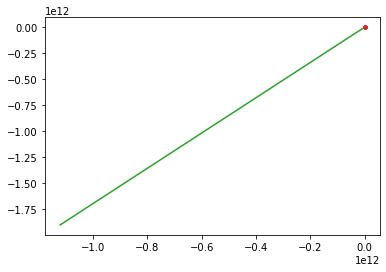

In [14]:
d=78
num_pts = 7
rat_degree = 3

f = lambda x: np.array([np.sin(x), x**1.4]).T

pts = np.random.rand(num_pts)
yy = f(pts)

f_poly = vector_polynomial_interpolation(pts, yy)
f_rat = vector_floater_hormann_rational_interpolation(tt, yy, rat_degree)

tt = np.linspace(0., 2., 500)
ff = f(tt)
ff_poly = f_poly(tt)
ff_rat = f_rat(tt)

plt.figure()
plt.plot(ff[:,0], ff[:,1])
plt.plot(ff_poly[:,0], ff_poly[:,1])
plt.plot(ff_rat[:,0], ff_rat[:,1])
plt.plot(yy[:,0], yy[:,1], '.')

In [15]:
vandermonde = pts.reshape((-1,1)) ** np.arange(len(pts)).reshape((1,-1))
coeffs = np.linalg.solve(vandermonde, yy)

print(coeffs)

print(np.dot(vandermonde, coeffs))
print(yy)

[[-3.65131553e-06 -9.73816446e-03]
 [ 1.00004883e+00  3.79931282e-01]
 [-2.71079790e-04  1.13810120e+00]
 [-1.65855055e-01 -9.90616583e-01]
 [-1.41916144e-03  7.71794192e-01]
 [ 9.78888465e-03 -3.65477616e-01]
 [-8.17780823e-04  7.60061597e-02]]
[[0.38499564 0.2726142 ]
 [0.4639988  0.36049674]
 [0.52127936 0.43120158]
 [0.78836327 0.87380918]
 [0.72852738 0.75247603]
 [0.83891403 0.99340501]
 [0.27828074 0.1699639 ]]
[[0.38499564 0.2726142 ]
 [0.4639988  0.36049674]
 [0.52127936 0.43120158]
 [0.78836327 0.87380918]
 [0.72852738 0.75247603]
 [0.83891403 0.99340501]
 [0.27828074 0.1699639 ]]


In [17]:
# polynomial_coeffs_from_roots(np.array([1,2,3]))
# ff
ff_rat

array([[ 1.04016311e+01,  1.76777036e+01],
       [-6.46635511e+03, -1.09180355e+04],
       [-6.14178886e+04, -1.03942144e+05],
       [-2.18997220e+05, -3.70890765e+05],
       [-5.33357369e+05, -9.03600016e+05],
       [-1.05865136e+06, -1.79390602e+06],
       [-1.84903221e+06, -3.13364488e+06],
       [-2.95865293e+06, -5.01465273e+06],
       [-4.44166657e+06, -7.52876568e+06],
       [-6.35222612e+06, -1.07678199e+07],
       [-8.74448461e+06, -1.48236514e+07],
       [-1.16725951e+07, -1.97880963e+07],
       [-1.51907105e+07, -2.57529909e+07],
       [-1.93529840e+07, -3.28101711e+07],
       [-2.42135684e+07, -4.10514731e+07],
       [-2.98266170e+07, -5.05687331e+07],
       [-3.62462826e+07, -6.14537871e+07],
       [-4.35267182e+07, -7.37984713e+07],
       [-5.17220770e+07, -8.76946217e+07],
       [-6.08865120e+07, -1.03234075e+08],
       [-7.10741760e+07, -1.20508666e+08],
       [-8.23392223e+07, -1.39610232e+08],
       [-9.47358037e+07, -1.60630609e+08],
       [-1.